In [3]:
import numpy as np
import acepacutils as apu
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Initialize the different PAC1D objects

Keep an overview of all the simulations you have created

In [2]:
path_pac1d_1 = "/STER/thomasko/APU_examples_simulations/pac-for-1D/"
path_pac1d_2 = "/STER/thomasko/APU_examples_simulations/pac-for-1D/"
path_pac1d_3 = "/STER/thomasko/APU_examples_simulations/pac-for-1D/"

Collect the simulations you want to analyze

In [5]:
outputfiles_pacace = {
    "Planet 1": [path_pac1d_1,
                 "/STER/thomasko/APU_examples_simulations/ACE-for-1D/"],
    "Planet 2": [path_pac1d_2,
                 "/STER/thomasko/APU_examples_simulations/ACE-for-1D/"],
}

path_figsave = "/lhome/thomasko/Downloads/"

Read in the correct things

In [6]:
pa_dict = {}
for file in list(outputfiles_pacace.keys()):
    print("file:", file)
    [pac_dir, ace_dir] = outputfiles_pacace[file]

    #load in the pac data
    PAC1D = apu.PAC1D(pac_dir, path_figsave)    
    PAC1D.read_1D_pac()
    print("\t with output nb:", PAC1D.get_converged_output_nb())
    
    #Load in the ace data
    ACE = apu.ACE1D(ace_dir)
    ACE.read_1D_ace()
    
    pa_dict[file] = [PAC1D, ACE]

file: Planet 1
	 with output nb: 22
file: Planet 2
	 with output nb: 22


# Get your plotting going

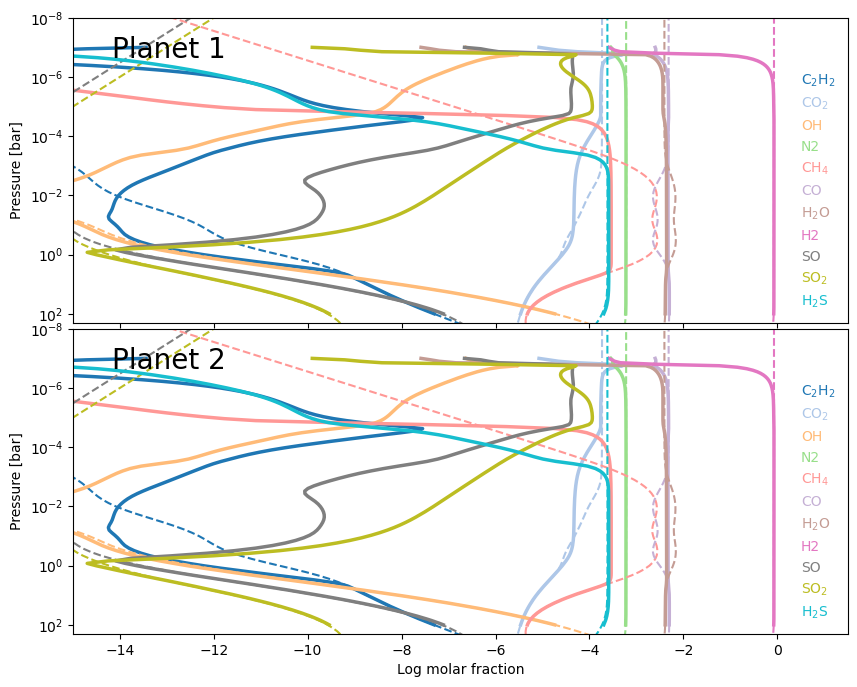

In [10]:
def compare_chemistry(pa_dict, 
           list_molecules = ['C2H2', 'CO2', 'OH', 'HCN', 'NH3', 'CH4', 'CO', 'H2O', 'H2', "SO2"],
           save = False):
    
    keys = list(pa_dict.keys())
    nb_keys = len(keys)
    
    #Init plot
    fig, axs = plt.subplots(nb_keys,1,figsize=(10,4*nb_keys),
                            sharey=False, sharex=True,
                            gridspec_kw = {'wspace':0.02, 'hspace':0.02}
                           )       
    axs = axs.reshape(-1)
    axsIter = iter(axs)
    
    #Init colors
    cmap = plt.get_cmap("tab20")
    colors = list(cmap(np.linspace(0.01,1, len(list_molecules)+1)))       
    c_iter = iter(colors)
    
    
    for ii in range(nb_keys):
        key = keys[ii]
        
        pac_df = pa_dict[key][0].get_pac1d_df()
        ace_df = pa_dict[key][1].get_ace_df()
        ax = next(axsIter)
        
        for m in list_molecules:
            
            #Try plotting
            try:
                c = next(c_iter)
                ax.semilogy(pac_df[m], pac_df["pressure_bar"],
                                c = c, label = apu.ppmol(m), lw=2.5)
                ax.semilogy(ace_df[m], ace_df["pressure_bar"],
                                    ls="--",c = c, lw=1.5)
            except:
                print(f"! plotting {m} did not work...")
                pass            
        
        c_iter = iter(colors)

        #put text
        ax.text(0.05, 0.94, key,
                horizontalalignment="left",
                verticalalignment="top",
                transform = ax.transAxes,
#                 c = "grey",
                        fontsize = 20,
                        clip_on=True)
        
        
        #Set up the plot some more
        ax.set_ylabel(r"");ax.set_xlabel(r"")        
        ax.set_xlim([-15, 1.5])
        ax.set_ylim([200, 1e-8])
        ax.set_title('')
        ax.set_ylabel(r"Pressure [bar]")
        legend = ax.legend(loc="lower right", labelcolor='linecolor',
                          handletextpad=0, handlelength=0, 
#                           framealpha = 0.5, 
                           frameon=False)#bbox_to_anchor=(1.25, 1))
        for item in legend.legendHandles:
            item.set_visible(False)
            
    #only for the last axis
    ax.set_xlabel("Log molar fraction")

    if save:
        s = [s.replace(" ", "") for s in list(list_molecules)]
        fig.savefig(path_figsave + "More_chemistry"+ "_".join(s)+ext,
                   bbox_inches='tight')
                   
                   
list_molecules = [
    'C2H2',
    'CO2', 
#     'OH',
    'N2',
    'CH4', 
    'CO',
    'H2O', 
    'H2',
    'SO',
    "SO2",
    "H2S"
]

compare_chemistry(pa_dict, list_molecules, save=False)

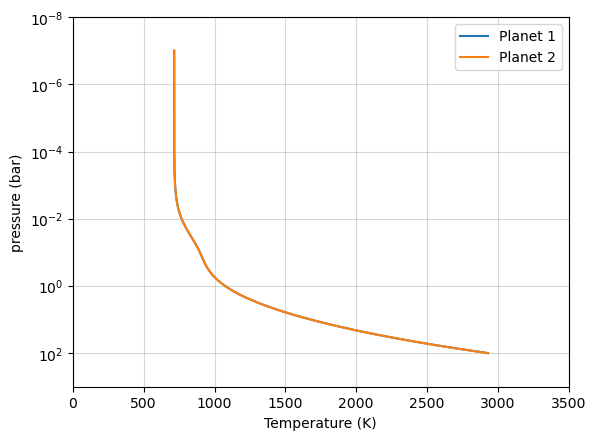

In [14]:
def compare_PT(pa_dict, save=False):
    
    for key in pa_dict.keys():
        df_selected = pa_dict[key][0].get_pac1d_df()

        ps = df_selected["pressure_bar"]
        Ts = df_selected["temperature_K"]
        plt.semilogy(Ts, ps, label=key)

    # plt.ylim([max(ps), min(ps)])
    plt.ylim([1e3, 1e-8])
    plt.xlim([0, 3500])
    plt.ylabel("pressure (bar)")
    plt.xlabel("Temperature (K)")
    plt.legend(loc="best")
    plt.grid(alpha=0.5)

    if save==True:
        plt.savefig(path_figsave + "temperatures" + ext, bbox_inches='tight')
        
compare_PT(pa_dict, save=False)

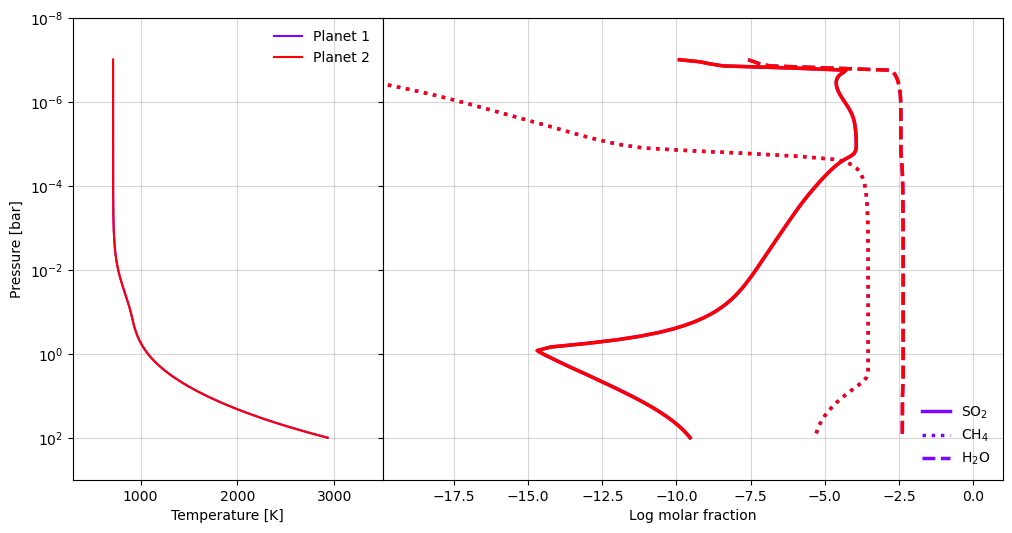

In [15]:
def compare_molecules(pa_dict,
              list_molecules = ['SO', "SO2"],
              save=False):
    
    #Init plot
    fig, axs = plt.subplots(1,2,figsize=(12,6),
                            sharey=True, sharex=False,
                            gridspec_kw = {'wspace':0.0, "width_ratios":[1, 2]}
                           )
    
    axs = axs.reshape(-1)
    linestyles = ["solid", "dotted", "dashed", "dashdot"]

    #Init colors
    cmap = plt.get_cmap("rainbow")
    colors = list(cmap(np.linspace(0.01,1, len(pa_dict.keys()))))       
    c_iter = iter(colors)
    

    mol_label=True
    for ii in range(len(pa_dict.keys())):
        
        c = next(c_iter)
        key = list(pa_dict.keys())[ii]
        df_list = pa_dict[key]
        
        #######################
        #Plot the T-P profile
        ax = axs[0]
        df_selected = df_list[0].get_pac1d_df()
        ps = df_selected["pressure_bar"]
        Ts = df_selected["temperature_K"]
        ax.semilogy(Ts, ps, label=key, c=c)
        ax.grid(alpha=0.5)
        ax.legend(loc="best",  frameon=False)
        
        ######################
        #Plot the molecules
        ax = axs[1]
        pac_df = df_list[0].get_pac1d_df()
        
        for jj in range(len(list_molecules)):
        
            m = list_molecules[jj]
            linestyle = linestyles[jj]

            #label switch
            label=None
            if mol_label==True:
                label = apu.ppmol(m)
            
            #Try plotting
            try:
                ax.semilogy(pac_df[m], pac_df["pressure_bar"],
                                c = c, label = label, lw=2.5, ls=linestyle)
            except:
                print(f"! plotting {m} did not work...")
                pass   
        
        mol_label=False

    #Fix the legends
    legend = axs[1].legend(loc="lower right", frameon=False)
            
    #Deal with the axis
    axs[1].set_xlabel("Log molar fraction")
    axs[0].set_xlabel("Temperature [K]")
    axs[0].set_ylabel(r"Pressure [bar]")
    axs[1].set_xlim([-19.9, 1])
    axs[0].set_ylim([1000, 1e-8])
    axs[0].set_xlim([300, 3500])
    axs[0].set_xticks([1000, 2000, 3000])
    axs[1].grid(alpha=0.5)

    if save:
        s = [s.replace(" ", "") for s in list(list_molecules)]
        fig.savefig(path_figsave + "Chemistry_TP_"+ "_".join(s)+ext,
                   bbox_inches='tight')

#################################
molecules = ["SO2", "CH4", "H2O"]
compare_molecules(pa_dict,
              list_molecules = molecules,
              save=False)

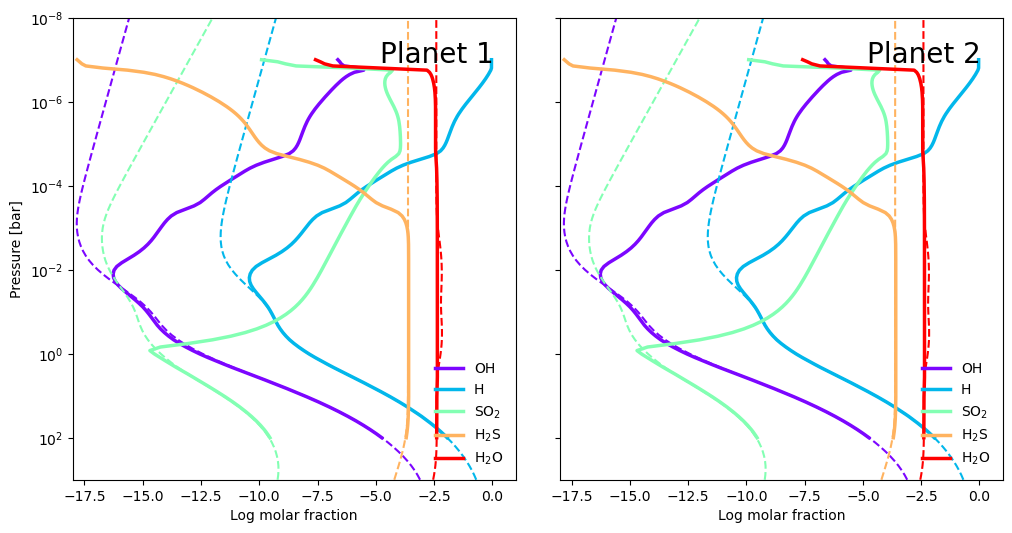

In [17]:
def plot_acepac_comparison(pa_dict,
              list_molecules = ['SO', "SO2"],
              save=False):
    
    #Init plot
    N = len(list(pa_dict.keys()))
    M = len(list_molecules)
    fig, axs = plt.subplots(1,N,figsize=(6*N,6),
                            sharey=True, sharex=True,
                            gridspec_kw = {'wspace':0.1})
    
    axs = axs.reshape(-1)
    axs_iter = iter(axs)

    #Init colors and linestyles
    cmap = plt.get_cmap("rainbow")
    colors = list(cmap(np.linspace(0.01,1, M)))       
    c_iter = iter(colors) 

    mol_label=True
    keys = list(pa_dict.keys())
    for ii in range(N):        
        ax = next(axs_iter)
        
        key = keys[ii]
        pac_df = pa_dict[key][0].get_pac1d_df()
        ace_df = pa_dict[key][1].get_ace_df()
        
        ######################
        #Plot the molecules        
        for jj in range(len(list_molecules)):
            m = list_molecules[jj]
            c = next(c_iter)

            #Try plotting
            try:
                ax.semilogy(pac_df[m], pac_df["pressure_bar"],
                                c = c,
                            label = apu.ppmol(m),
                            lw=2.5)
                ax.semilogy(ace_df[m], ace_df["pressure_bar"],
                                    ls="--",c = c, lw=1.5)
            except:
                print(f"! plotting {m} did not work...")
                pass   
        
        mol_label=False

        #Fix the legends
        legend = ax.legend(loc="lower right",frameon=False)
            
        #Deal with the axis
        ax.set_xlabel("Log molar fraction")
        axs[0].set_ylabel(r"Pressure [bar]")
        ax.set_xlim([-18, 1])
        ax.set_ylim([1000, 1e-8])
        
        #put text
        ax.text(0.95, 0.95, key,
                horizontalalignment="right",
                verticalalignment="top",
                transform = ax.transAxes,
                        fontsize = 20,
                        clip_on=True)
        #reset colors
        c_iter = iter(colors)

    if save:
        s = [s.replace(" ", "") for s in list(list_molecules)]
        fig.savefig(path_figsave + "ACEPAC_comparison_"+ "_".join(s)+ext,
                   bbox_inches='tight')

##################################

molecules = ["OH", "H", "SO2", "H2S", "H2O"]
plot_acepac_comparison(pa_dict,
              list_molecules = molecules,
              save=False)

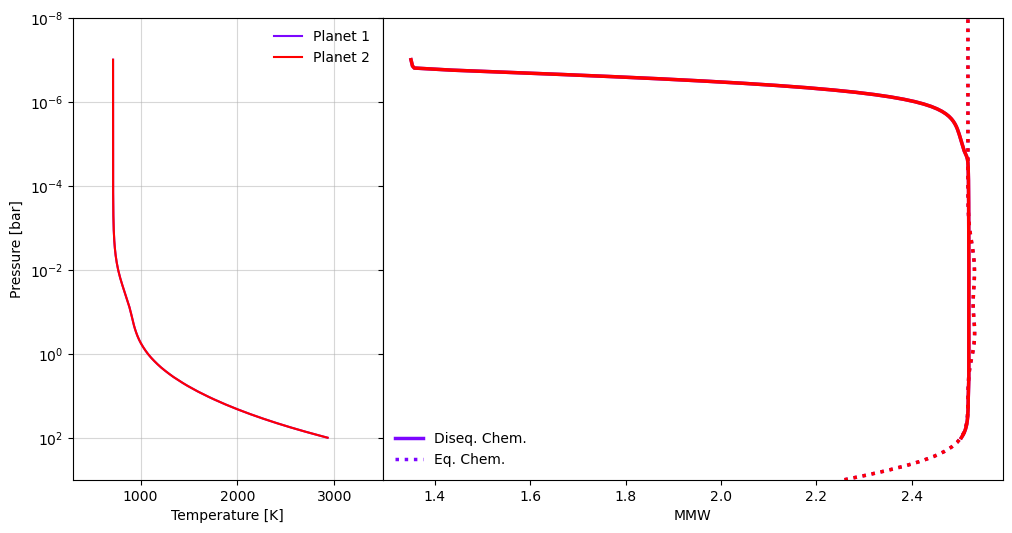

In [18]:
def plot_mmw_comparison(pa_dict,save=False):
    
    #Init plot
    fig, axs = plt.subplots(1,2,figsize=(12,6),
                            sharey=True, sharex=False,
                            gridspec_kw = {'wspace':0.0, "width_ratios":[1, 2]}
                           )
    
    axs = axs.reshape(-1)
    linestyles = ["solid", "dotted", "dashed", "dashdot"]

    #Init colors
    cmap = plt.get_cmap("rainbow")
    colors = list(cmap(np.linspace(0.01,1, len(pa_dict.keys()))))       
    c_iter = iter(colors)
    

    right_label=True
    for ii in range(len(pa_dict.keys())):
        
        c = next(c_iter)
        key = list(pa_dict.keys())[ii]
        df_list = pa_dict[key]
        pac1d = df_list[0]
        ace = df_list[1]
        
        #######################
        #Plot the T-P profile
        ax = axs[0]
        pac_df_selected = pac1d.get_pac1d_df()
        ps = pac_df_selected["pressure_bar"]
        Ts = pac_df_selected["temperature_K"]
        ax.semilogy(Ts, ps, label=key, c=c)
        ax.grid(alpha=0.5)
        ax.legend(loc="best", frameon=False)
        
        ######################
        #Plot the mmw
        ax = axs[1]
        pac_df = pac1d.get_pac1d_df()
        ace_df = ace.get_ace_df()
            
        if right_label==True:
            label_pac = "Diseq. Chem."
            label_ace = "Eq. Chem."
            label_pac_ret = "DisChem. limited"
            label_ace_ret = "EqChem. limited"
            
        else:
            label_pac = label_ace = label_pac_ret = label_ace_ret = None
            
        #############################################Plot pac full network
        linestyle = linestyles[0]
        mmws = pac1d.get_mean_molecular_weight(per_layer=True)
        pressures = pac_df["pressure_bar"]
        ax.semilogy(mmws, pressures, c = c,
                    lw=2.5, ls=linestyle, label=label_pac)
        
        #############################################Plot ace full network
        linestyle = linestyles[1]
        mmws = ace.get_mean_molecular_weight(per_layer=True)
        pressures = ace_df["pressure_bar"]
        ax.semilogy(mmws, pressures, c = c,
                    lw=2.5, ls=linestyle, label=label_ace)
        
        right_label = False

        
        
    #Fix the legends
    legend = axs[1].legend(loc="lower left",
#                            labelcolor='linecolor',
#                       handletextpad=0, handlelength=0, 
                       frameon=False)
            
    #Deal with the axis
    axs[1].set_xlabel("MMW")
    axs[0].set_xlabel("Temperature [K]")
    axs[0].set_ylabel(r"Pressure [bar]")
    
#     axs[1].set_xlim([-15, 1])
    axs[0].set_ylim([1000, 1e-8])
    axs[0].set_xlim([300, 3500])
    axs[0].set_xticks([1000, 2000, 3000])

    if save:
        fig.savefig(path_figsave + "MMW_TP_"+ext,
                   bbox_inches='tight')

###################################################################################

plot_mmw_comparison(pa_dict, save=False)

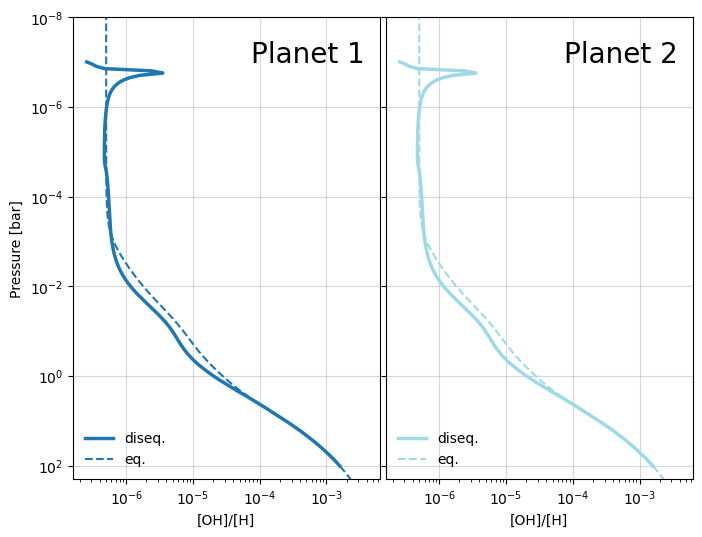

In [30]:
def plot_ratio(pa_dict, mol1, mol2,  save = False):
    
    keys = list(pa_dict.keys())
    nb_keys = len(keys)
    
    #Init plot
    fig, axs = plt.subplots(1,nb_keys,figsize=(4*nb_keys,6),
                            sharey=True, sharex=True,
                            gridspec_kw = {'wspace':0.02, 'hspace':0.02}
                           )       
    axs = axs.reshape(-1)
    axsIter = iter(axs)
    
    #Init colors
    cmap = plt.get_cmap("tab20")
    colors = list(cmap(np.linspace(0.01,1, nb_keys)))       
    c_iter = iter(colors)
    
    
    
    for ii in range(nb_keys):
        key = keys[ii]
        c = next(c_iter)
        ax = next(axsIter)
        
        pac_df = pa_dict[key][0].get_pac1d_df()
        ace_df = pa_dict[key][1].get_ace_df()
        
        #Upper row of plots
        ax.loglog(10**pac_df[mol1]/10**pac_df[mol2],
                    pac_df["pressure_bar"], c = c,
                  label="diseq.", lw=2.5)
        
        ax.loglog(10**ace_df[mol1]/10**ace_df[mol2],
                  ace_df["pressure_bar"],
                            ls="--",c = c, label="eq.", lw=1.5)        
        
        #put text
        ax.text(0.95, 0.95, key,
                horizontalalignment="right",
                verticalalignment="top",
                transform = ax.transAxes,
                        fontsize = 20,
                        clip_on=True)
        
        
        #Set up the plot some more
        ax.set_ylabel(r"");ax.set_xlabel(r"")        
#         ax.set_ylim(*ax.get_ylim()[::-1])
        ax.set_ylim([200, 1e-8])
#         ax.set_xlim([1.1e-8, 9.9e-4])
        ax.set_xlabel(f"[{mol1}]/[{mol2}]")
        legend = ax.legend(loc="lower left", frameon=False)
        ax.grid(True, alpha=0.5)
        
        
    axs[0].set_ylabel(r"Pressure [bar]")

            
    if save:
        fig.savefig(path_figsave + f"{mol1}_to_{mol2}_ratio"+ext,
                   bbox_inches='tight')
                

plot_ratio(pa_dict, mol1="OH", mol2="H", save=False)